In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading Input Data
df = pd.read_excel('custemor_data.xlsx')
df.head()

,Income,Spendings
0,80,24.0
1,85,25.5
2,87,26.1
3,75,22.5
4,78,23.4


In [3]:
df.head()

,Income,Spendings
0,80,24.0
1,85,25.5
2,87,26.1
3,75,22.5
4,78,23.4


Text(0.5, 1.0, 'Customer Data')

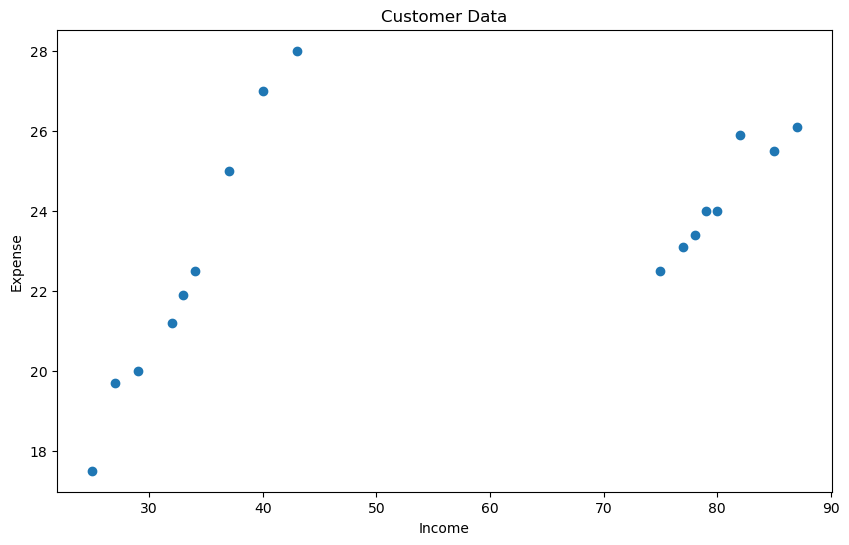

In [4]:
#Plot data points
plt.figure(figsize=(10,6))
plt.scatter(df['Income'],df["Spendings"])
plt.xlabel('Income')
plt.ylabel('Expense')
plt.title('Customer Data')

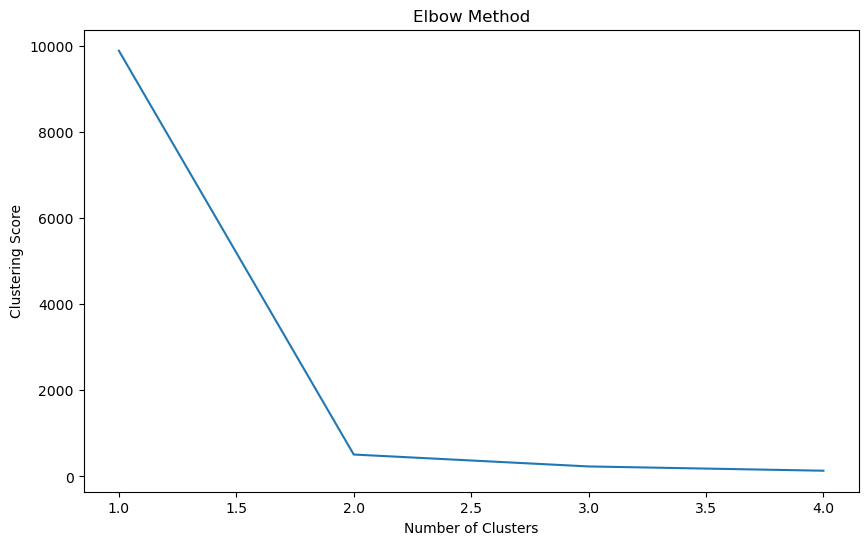

In [5]:
individual_clustering_score = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(df)
    individual_clustering_score.append(kmeans.inertia_) 
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 5), individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [6]:
individual_clustering_score

[9894.430588235295, 508.66375, 231.78375, 132.27333333333334]

In [7]:
#Fit the model and predict
kmeans= KMeans(n_clusters = 2, random_state = 42)


kmeans.fit(df)


pred = kmeans.predict(df)

pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] ) #Adding cluster column to main data

In [9]:
df.head()

,Income,Spending,Cluster
0,80,24.0,1
1,85,25.5,1
2,87,26.1,1
3,75,22.5,1
4,78,23.4,1


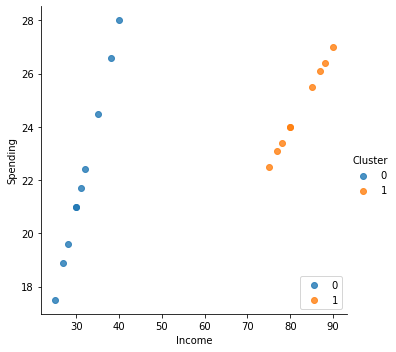

In [10]:
import seaborn as sns

# 'hue' argument to provide a factor variable
sns.lmplot( x="Income", y="Spending", data=df, fit_reg=False, hue='Cluster', legend=True)
 
plt.legend(loc='lower right')

plt.show()

In [11]:
kmeans.cluster_centers_

array([[31.6       , 22.12      ],
       [82.22222222, 24.66666667]])